## Importeren van de data

Als eerste moeten we de data importen. We openen daarvoor de csv file en zetten de data in verschillende variabelen:

* columns is een dictionary die de naam van de kolom vertaalt naar de index voor de data array
* rows is een list van elke rij die als een list is opgeslagen
* data is een dictionary van de index van de kolom naar een lijst van data voor die kolom

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

filename = 'utrecht.csv'

columns = {}
rows = []
data = {}

# hulp functie om te kijken of de waarde een integer is
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        # anders reageren als het de eerste regel is, dat zijn namelijk de kolomnamen
        if line_count == 0:
            line_count += 1
            i = 0
            for c in row:
                columns[c] = i
                data[i] = []
                i += 1
        else:
            line_count += 1
            # alleen importeren als het maanddata is, niet de cummulatieven over een jaar
            if 'JJ00' in row[columns['Perioden']]:
                pass
            else:
                rows.append(row)
                i = 0
                for c in row:
                    if is_number(c):
                        data[i].append(int(c))
                    else:
                        data[i].append(c)
                    i = i+1
    print(f'Processed {line_count} lines.')

Processed 224 lines.


Hier printen we de namen van de kolommen zodat je kan zien welke data er in het bestand zit

In [3]:
print(columns)

{'ï»¿ID': 0, 'RegioS': 1, 'Perioden': 2, 'BevolkingAanHetBeginVanDePeriode_1': 3, 'LevendGeborenKinderen_2': 4, 'Overledenen_3': 5, 'TotaleVestiging_4': 6, 'VestigingVanuitEenAndereGemeente_5': 7, 'Immigratie_6': 8, 'TotaalVertrekInclAdmCorrecties_7': 9, 'VertrekNaarAndereGemeente_8': 10, 'EmigratieInclusiefAdmCorrecties_9': 11, 'OverigeCorrecties_10': 12, 'Bevolkingsgroei_11': 13, 'BevolkingsgroeiRelatief_12': 14, 'BevolkingsgroeiSinds1Januari_13': 15, 'BevolkingsgroeiSinds1JanuariRela_14': 16, 'BevolkingAanHetEindeVanDePeriode_15': 17}


## Verwerken van de data

Hier printen we de data voor alle maanden van het laatste jaar van het vertrek uit de gemeente.

In [3]:
print(data[columns['VertrekNaarAndereGemeente_8']][-12:-1])

[1796, 1475, 1518, 1679, 2083, 2300, 1901, 1815, 1646, 1670, 1924]


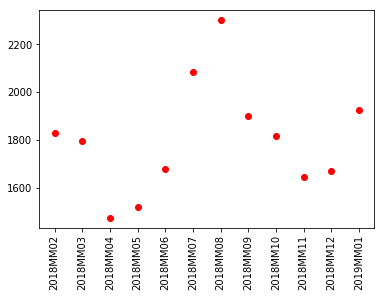

In [4]:
plt.plot( data[columns['Perioden']][-13:-1], data[columns['VertrekNaarAndereGemeente_8']][-13:-1], 'ro')
plt.xticks(rotation=90)
plt.show()